<a href="https://colab.research.google.com/github/Computerglassformedandsurg/ML_Algorithms/blob/main/Copy_of_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import os

'file name = /Cells.csv - Sheet1.csv '

Import the database

In [ ]:
from google.colab import drive
# Define the mount point
mount_point = 'content/drive'

# Check if the parent directory exists, and create it if it doesn't
parent_dir = os.path.dirname(mount_point)
if not os.path.exists(parent_dir):
    os.makedirs(parent_dir)
    print(f"Created directory: {parent_dir}")

# Mount Google Drive
drive.mount(mount_point)

Created directory: content
Mounted at content/drive


In [ ]:
df = pd.read_csv("/content/content/drive/MyDrive/ML_Colab_Digital_Sreeni/Linear Regression/Data/Cells.csv - Sheet1.csv")

Printing documents

In [ ]:
print(df)

    Time  Cells
0    0.0    205
1    0.5    225
2    1.0    238
3    1.5    240
4    2.0    248
5    2.5    260
6    3.0    265
7    3.5    283
8    4.0    301
9    4.5    305
10   5.0    309


Plotting

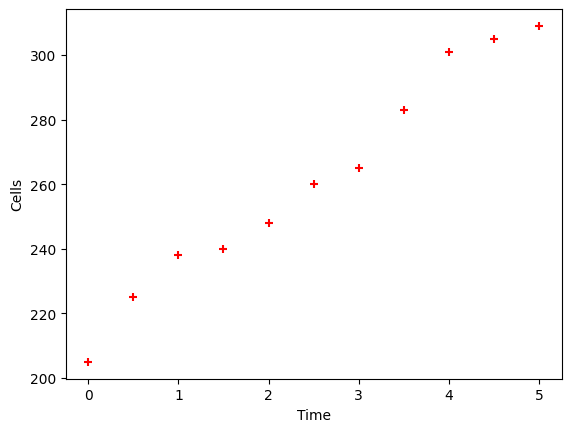

In [ ]:
plt.xlabel("Time")
plt.ylabel("Cells")
plt.scatter(df.Time, df.Cells, color="red", marker="+")

Data preperation

In [ ]:
# x is independent
# y is the dependent (to be predicted)
# x_df = df.drop('Cells', axis='columns') # this is good
x_df = df[['Time']] # x_df is the object - if you eliminate the outer bracket, you get float64 (series) instead of object
y_df = df.Cells

Defining the model and training it on the data

In [ ]:
reg_model = linear_model.LinearRegression()
reg_model.fit(x_df,y_df) #fitting or training

LinearRegression()

Testing for a single instance

In [ ]:
print("predicted num of cells:", reg_model.predict([[2.5]]))

predicted num of cells: [261.72727273]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Model performance score

In [ ]:
print(reg_model.score(x_df,y_df))

0.9784252641866715


Printing optimal values

In [ ]:
# slope
m = reg_model.coef_
print("slope is",m)

# intercept
c = reg_model.intercept_
print("intercept is", c)

slope is [20.58181818]
intercept is 210.27272727272728


Doing manual calculation using the printed values

In [ ]:
print("manual calcualtions:", m*2.5+ c)

manual calcualtions: [261.72727273]


:Testing on the test data

In [ ]:
predict_df = pd.read_csv("/content/content/drive/MyDrive/ML_Colab_Digital_Sreeni/Linear Regression/Data/cells_predict - Sheet1.csv")

In [ ]:
predicted_cells = reg_model.predict(predict_df)

In [ ]:
print(predicted_cells)

[210.27272727 212.33090909 214.38909091 216.44727273 218.50545455
 220.56363636 222.62181818 224.68       226.73818182 228.79636364
 230.85454545 232.91272727 234.97090909 237.02909091 239.08727273
 241.14545455 243.20363636 245.26181818 247.32       249.37818182
 251.43636364]


In [ ]:
predict_df["cells"] = predicted_cells

In [ ]:
predict_df

,Time,cells
0,0.0,210.272727
1,0.1,212.330909
2,0.2,214.389091
3,0.3,216.447273
4,0.4,218.505455
5,0.5,220.563636
6,0.6,222.621818
7,0.7,224.680000
8,0.8,226.738182
9,0.9,228.796364


In [ ]:
# predict_df.to_csv("/content/content/drive/MyDrive/ML_Colab_Digital_Sreeni/Linear Regression/Data/predicted_cells.csv")